# Lecture 6.1: Regression Redux  

## Outline

* Review: simple linear regression
* Inference
    * Point estimate
    * Confidence interval
    * Hypothesis testing
    
## Objectives

* Model data using simple linear regression
* Calculate confidence intervals for regression coefficients
* Test if a variable is significant in a regression model

## Review: Simple Linear Regression  

### Regression Analysis  

* Regression analysis is used to predict the value of one variable (the dependent variable) on the basis of other variables (the independent variables).
    * Dependent variable: denoted $Y$
    * Independent variables: denoted $X_1, X_2, \dots, X_k$

* In Simple Linear Regression, one $X$ variable is used to explain the variable $Y$  

* In Multiple Linear Regression, more than one $X$ variable is used to explain the variable $Y$  

**Example**  


Data were collected on a number of different cars, and we would like to predict the MPG (miles per gallon) of the cars using the variable `horsepower`.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql("SELECT * FROM cars WHERE horsepower IS NOT NULL;", engine, index_col='index')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
index,,,,,,,,,
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


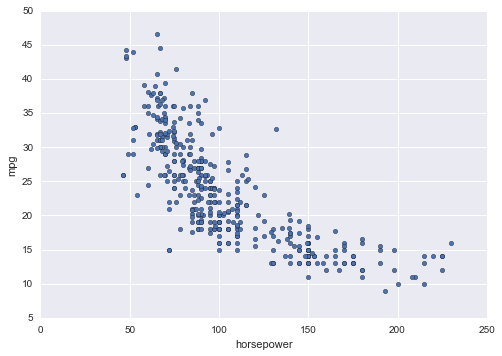

In [3]:
cars.plot('horsepower', 'mpg', kind='scatter');

In [7]:
A = np.array([[1,2,3],
             [4,5,6]])
print(len(A))

2


In [4]:
X = cars.horsepower
X = sm.add_constant(X)
y = cars.mpg

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           7.03e-81
Time:                        13:15:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

The equation of our regression line is given by  

$$ \hat{mpg} = 39.9359 - 0.1578 \times horsepower $$  

Interpretation?  

Model fit?  

### The Model We Assume  

$$y = \beta_0 + \beta_1 x + \varepsilon $$  


$$ \varepsilon \sim N(0, \sigma^2) $$

### Y-hat

Our fitted model is give by 

$$ \hat{y} = b_0 + b_1 x $$

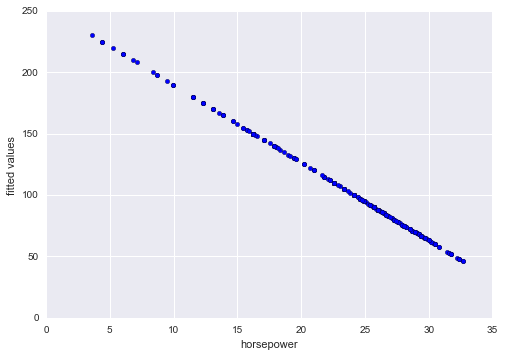

In [8]:
y_hat = results.fittedvalues
xlabel('horsepower')
ylabel('fitted values')
scatter(y_hat, cars.horsepower);

### Residuals: difference between observed and expected

For the $i^{th}$ observation,  

$$e_i = y_i - \hat{y}_i $$


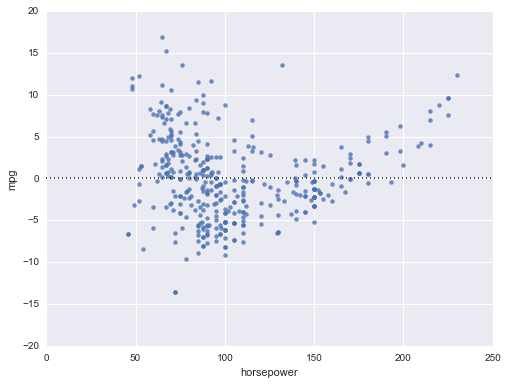

In [9]:
figure(figsize=(8, 6))
sns.residplot('horsepower', 'mpg', data=cars);

### Ordinary Least Squares

We estimate the coefficients by minimizing   

$$\sum_{i=1}^n e_i^2$$   

which gives us  

$$b_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$  

or  

$$b_1 = r_{xy} \frac{s_y}{s_x}$$    
    
where $r_{xy}$ is the correlation between $x$ and $y$, $s_x$ and $s_y$ are the standard deviations of $x$ and $y$  

$$b_0 = \bar{y} - b_1 \bar{x}$$  

**Note!!!**

$b_0$ is not $\beta_0$  


$b_1$ is not $\beta_1$  


$e_i$ is not $\varepsilon_i$  

### Assumptions of the Simple Linear Regression Model  

* Linearity: there is a linear relationship between $x$ and $y$  

* Normality: the residuals are nearly Normal  

* Constant variance: the residuals have constant variance  

* Independent observations: the observations are independent of each other

### Review: $R^2$  

We have   

$$Y = \hat{Y} + e $$  

$$corr(\hat{Y}, e) = 0 $$  

Then 

$$ Var(Y) = Var(\hat{Y} + e) = Var(\hat{Y}) + Var(e) $$  

or,  

$$ \frac{1}{n-1} \sum_{i = 1}^n (y_i - \bar{y})^2 = \frac{1}{n-1} \sum_{i = 1}^n (\hat{y}_i - \bar{y})^2 + \frac{1}{n-1} \sum_{i = 1}^n e_i^2 $$  

or, $$ \sum_{i = 1}^n (y_i - \bar{y})^2 = \sum_{i = 1}^n (\hat{y}_i - \bar{y})^2 + \sum_{i = 1}^n e_i^2 $$  

So  

$$ SST = SSR + SSE $$

* We have a “good fit” if $SSR$ is big and $SSE$ is small    

* If $SST = SSR$ we have a perfect fit  

* To summarize how close $SSR$ is to $SST$ we define the *coefficient of determination*  

$$ R^2 = \frac{SSR}{SST} $$  

* The the proportion of variation in Y explained by the regression  

* $R^2$ is between 0 and 1, and the closer $R^2$ is to 1, the better the fit.  

* In the simple linear regression case, $R^2 = r^2$, where $r$ is the correlation coefficient between $x$ and $y$

#### Caution about $R^2$  

* $R^2$ does not indicate whether a regression model is adequate  

* It is not always true that, the higher the value of $R^2$, the better the model.  

## Confidence Intervals for the Regression Parameters

### The Average Line  

The regression line should be viewed as the average value of $Y$ for a given $X$, or in symbols $E(Y|X)$  

$$ E(Y | X) = \beta_0 + \beta_1 X $$

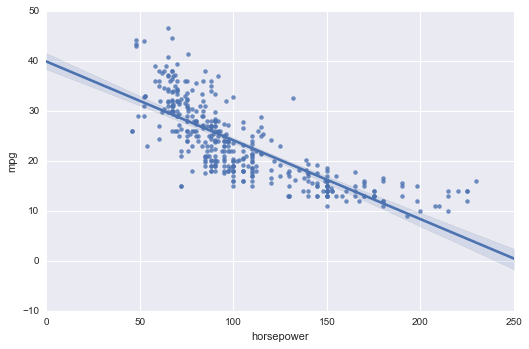

In [10]:
sns.lmplot('horsepower', 'mpg', data=cars, aspect=1.5);

The model can be written as  

$$ Y = E(Y | X) + \varepsilon $$  

and  

$$ \varepsilon \sim N(0, \sigma^2) $$

### How Do We Estimate $\sigma$?  

$$s_e^2 = \frac{1}{n - 2} \sum_{i = 1}^n e_i^2 = \frac{SSE}{n - 2} $$  

This is called the mean square error (MSE) of the regression.


$s_e^2$ is our estimate of $\sigma^2$  


$ s_e = \sqrt{s_e^2}$ is our estimate of $\sigma$

### How Sure Are We?  

$b_0$ is a guess of $\beta_0$   

$b_1$ is a guess of $\beta_1$  


These are point estimates. A point estimate without some idea of precision is useless.  




In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           7.03e-81
Time:                        13:48:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$s_{b_0}$: amount of uncertainty in our estimate of $\beta_0$  
* small, GOOD, lots of info in data about $\beta_0$  
* large, BAD, little info about $\beta_0$  


$s_{b_1}$: amount of uncertainty in our estimate of $\beta_1$  
* small, GOOD, lots of info in data about $\beta_1$  
* large, BAD, little info about $\beta_1$  

A **Confidence interval for $\beta_0$** is given by  

$$ b_0 \pm 1.96 (s_{b_0}) $$  

where  

$$ Var(b_0) = s^2_{b_0} = s^2_e \left( \frac{1}{n} + \frac{\bar{x}^2}{(n-1)s^2_x} \right)$$

In the example, the standard error of $b_0$ is 0.717, and the confidence interval for $\beta_0$ is  

$$(38.525 \text{, } 41.347) $$

A **Confidence interval for $\beta_1$** is given by  

$$ b_1 \pm 1.96 (s_{b_1}) $$  

where  

$$ Var(b_1) = s^2_{b_1} = \frac{s^2_e}{(n-1)s^2_x}$$

In the example, the standard error of $b_1$ is 0.006, and the confidence interval for $\beta_1$ is  

$$(-0.171 \text{, } -0.145) $$

### Hypothesis Tests for the Regression Parameters

### Review: 3 Step Plan  

1) Model: $Y = \beta_0 + \beta_1 X + \varepsilon$ and $\varepsilon \sim N(0, \sigma^2)$  

2) Data: $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$  

3) Estimate: 

$\beta_0, \beta_1, \sigma$ Truth  

$b_0, b_1, s$ Guesses

Suppose you want to test whether $\beta_1$ equals a proposed value:  

$H_0: \beta_1 = \beta_1^*$  

$H_a: \beta_1 \neq \beta_1^*$  


For example, if we want test whether X affects Y, we would test whether $\beta_1 = 0$.

**Test statistic**:  

$$ t_{stat} = \frac{b_1 - \beta_1^*}{s_{b_1}} $$

**Example**  

Suppose we want to test if `horsepower` is related to `mpg` at all

$H_0: \beta_1 = 0$  

$H_a: \beta_1 \neq 0$  

Test statistic:  

$$ t_{stat} = \frac{b_1 - 0}{s_{b_1}} = \frac{b_1}{s_{b_1}} = -24.489 $$  

In [12]:
results.tvalues

const         55.659841
horsepower   -24.489135
dtype: float64

P-value:  

$$\text{p-value} = P(t < -|t_{stat}| \text{ or } t > |t_{stat}|) = 2 \times P(t < -|t_{stat}|) = 7.03 \times 10^{-81} < 0.05 $$

In [14]:
results.pvalues

const         1.220362e-187
horsepower     7.031989e-81
dtype: float64

We have extremely strong evidence to reject the null, which means `horsepower` is a statistically significant predictor in the model.